In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Input

In [53]:
df = pd.read_csv('EastAfricanBreweriesLtdHistoricalPrices.csv')

In [54]:
print(df.shape)

(6134, 6)


In [55]:
display(df.head())


,Date,Open,High,Low,Close,Volume
0,12/31/24,173.25,181.50,173.00,175.50,18000.0
1,12/30/24,181.75,181.75,181.75,181.75,200.0
2,12/27/24,175.50,182.00,175.25,177.50,900.0
3,12/24/24,182.00,182.00,175.00,175.25,5900.0
4,12/23/24,175.00,182.00,170.25,172.50,26700.0


In [56]:
display(df.tail())

,Date,Open,High,Low,Close,Volume
6129,01/12/00,9.72,9.72,9.72,9.72,17424.008053
6130,01/07/00,9.72,9.72,9.72,9.72,2556.001181
6131,01/06/00,9.72,9.72,9.72,9.72,49687.222965
6132,01/05/00,9.72,9.72,9.72,9.72,11419.205278
6133,01/04/00,9.72,9.72,9.72,9.72,720.000333


In [57]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     6134 non-null   object 
 1    Open    6134 non-null   float64
 2    High    6134 non-null   float64
 3    Low     6134 non-null   float64
 4    Close   6134 non-null   float64
 5    Volume  6134 non-null   float64
dtypes: float64(5), object(1)
memory usage: 287.7+ KB


None

In [58]:
display(df.isnull().sum())

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [59]:
display(df.describe())

,Open,High,Low,Close,Volume
count,6134.000000,6134.000000,6134.000000,6134.000000,6.134000e+03
mean,161.844724,163.122276,160.519203,161.749640,2.335645e+05
std,86.532822,87.601813,85.527219,86.546786,4.025529e+05
min,8.610000,8.610000,8.610000,8.610000,1.000000e+02
25%,115.000000,115.000000,115.000000,115.000000,2.190600e+04
50%,162.500000,164.500000,160.500000,162.250000,9.525000e+04
75%,218.000000,220.000000,216.000000,218.000000,2.767493e+05
max,423.000000,426.000000,416.000000,423.000000,7.225621e+06


<ipython-input-60-f4d3c309c368>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


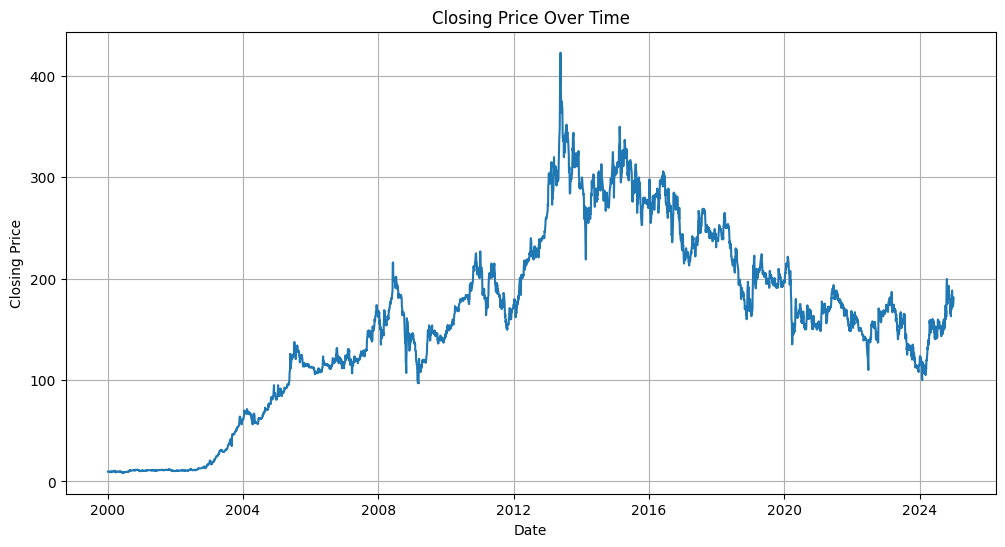

In [60]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df[' Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time')
plt.grid(True)
plt.show()

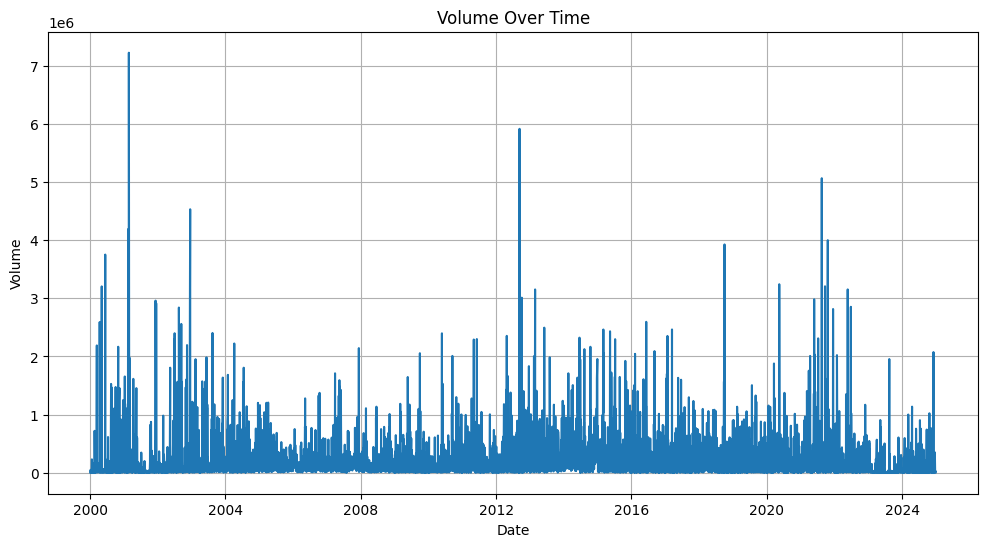

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df[' Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Over Time')
plt.grid(True)
plt.show()

In [62]:
# Timeframe Determination
start_date = df['Date'].min()
end_date = df['Date'].max()
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")


Start Date: 2000-01-04 00:00:00
End Date: 2024-12-31 00:00:00


,Open,High,Low,Close,Volume
Open,1.000000,0.999676,0.999564,0.999883,0.081319
High,0.999676,1.000000,0.999168,0.999699,0.082790
Low,0.999564,0.999168,1.000000,0.999608,0.080381
Close,0.999883,0.999699,0.999608,1.000000,0.081719
Volume,0.081319,0.082790,0.080381,0.081719,1.000000


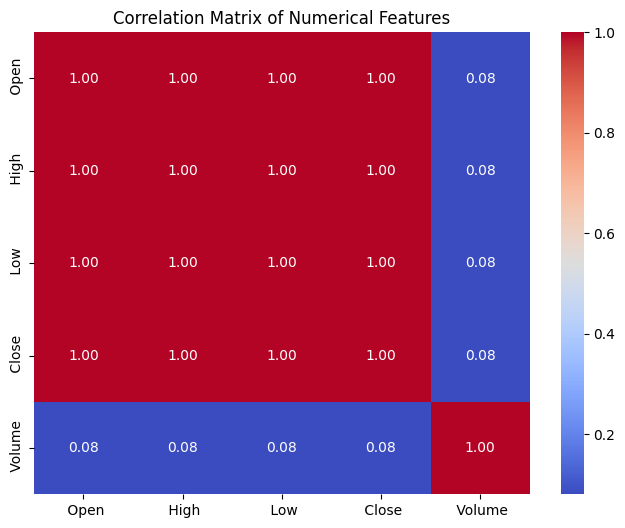

In [63]:
# Correlation Analysis
numerical_features = [' Open', ' High', ' Low', ' Close', ' Volume']
correlation_matrix = df[numerical_features].corr()
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [64]:
# Ensure 'Date' column is datetime
if not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values(by='Date')

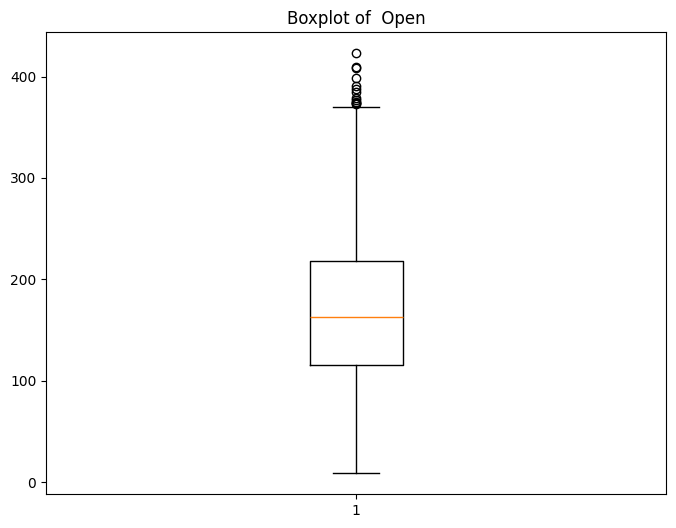

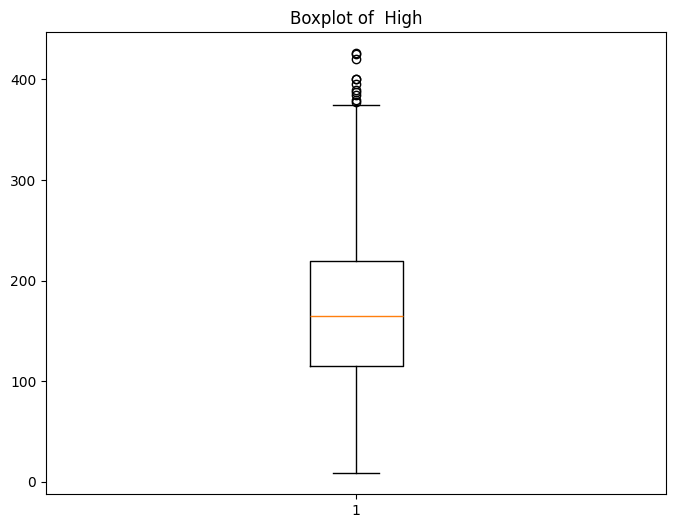

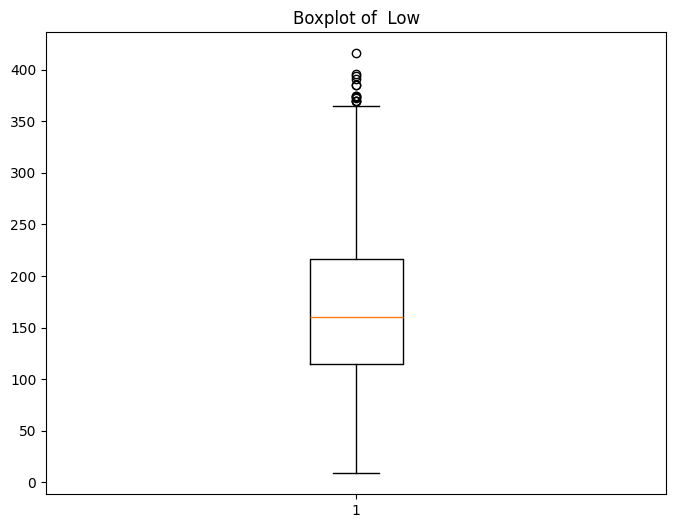

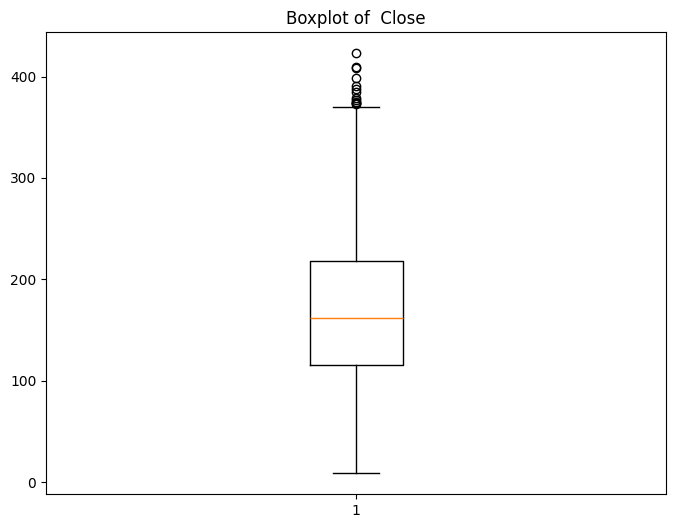

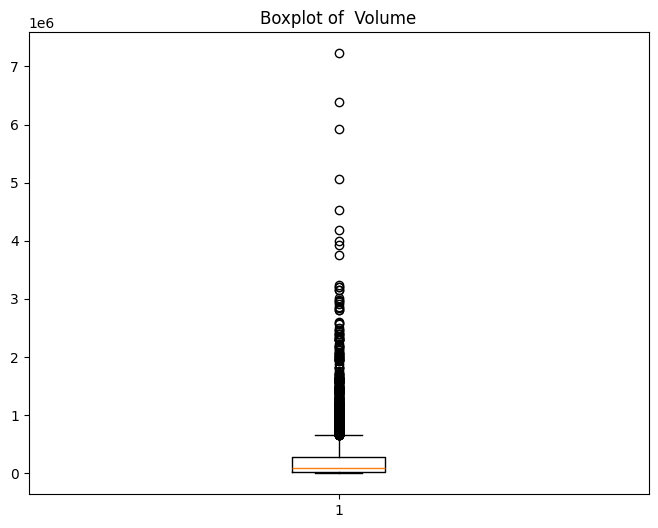

In [65]:
# Check for and handle outliers
numerical_cols = [' Open', ' High', ' Low', ' Close', ' Volume']
for col in numerical_cols:
    # Visualize outliers with boxplot
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {col}')
    plt.boxplot(df[col])
    plt.show()

    # Handle outliers using IQR and capping at 99th percentile
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    upper_limit = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_limit)

,Date,Open,High,Low,Close,Volume
count,6134,6134.000000,6134.000000,6134.000000,6134.000000,6.134000e+03
mean,2012-08-21 23:02:43.156178688,161.652517,162.912136,160.348929,161.557432,2.249729e+05
min,2000-01-04 00:00:00,8.610000,8.610000,8.610000,8.610000,1.000000e+02
25%,2006-07-11 06:00:00,115.000000,115.000000,115.000000,115.000000,2.190600e+04
50%,2012-08-29 12:00:00,162.500000,164.500000,160.500000,162.250000,9.525000e+04
75%,2018-10-28 06:00:00,218.000000,220.000000,216.000000,218.000000,2.767493e+05
max,2024-12-31 00:00:00,337.000000,340.000000,334.670000,337.000000,1.955902e+06
std,NaN,86.097545,87.124761,85.141780,86.111368,3.369081e+05


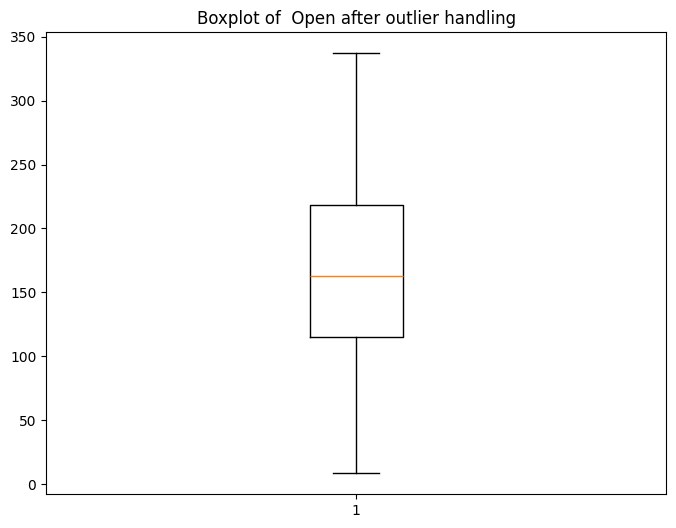

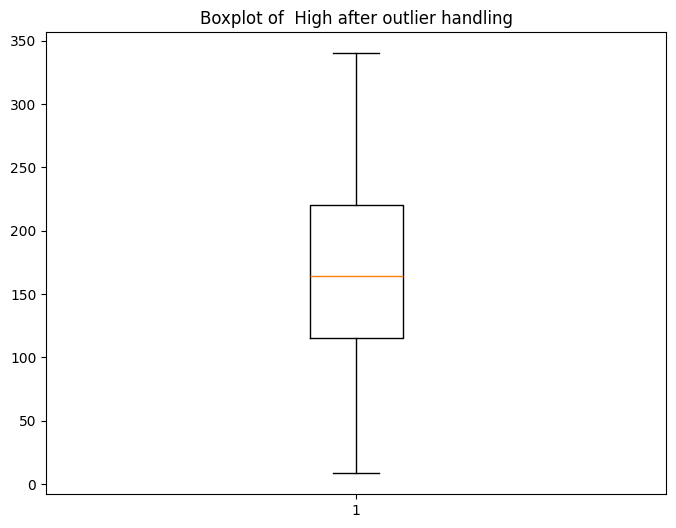

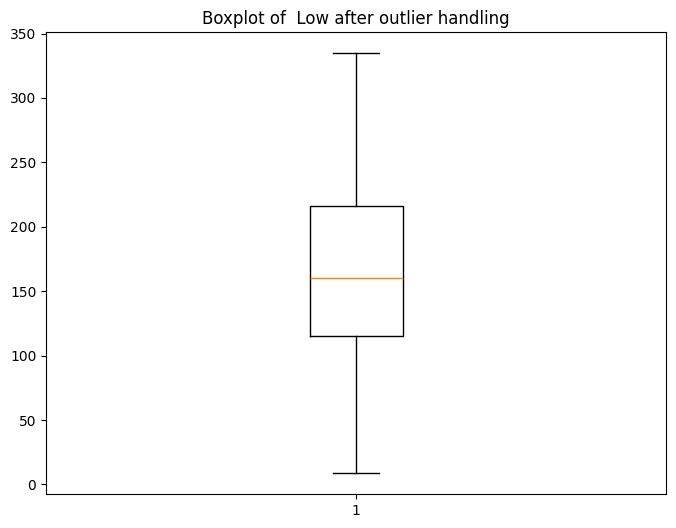

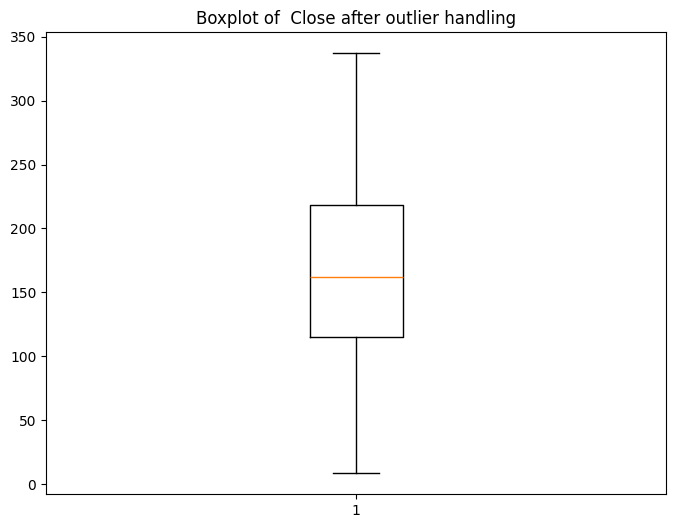

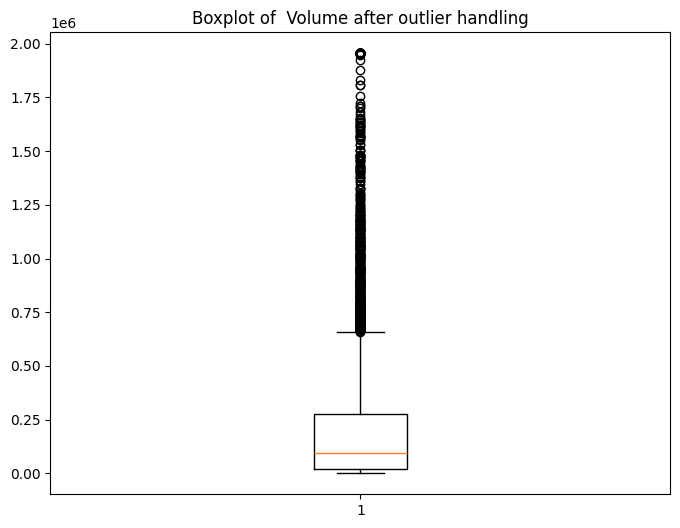

In [66]:
# Re-inspect the data after cleaning
display(df.describe())
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {col} after outlier handling')
    plt.boxplot(df[col])
    plt.show()

df_cleaned = df.copy()

In [67]:
# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_cleaned[[' Open', ' High', ' Low', ' Close', ' Volume']])

In [68]:
# Sequence Creation
sequence_length = 60  # Experiment with this value
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i, 3])  # Predict 'Close' price

X, y = np.array(X), np.array(y)

In [69]:
# Data Splitting
# Calculate the index for the last 365 days (1 year)
test_data_size = 365
test_split_index = len(X) - test_data_size
X_train_val, X_test, y_train_val, y_test = X[:test_split_index], X[test_split_index:], y[:test_split_index], y[test_split_index:]
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, shuffle=False)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5138, 60, 5)
y_train shape: (5138,)
X_val shape: (571, 60, 5)
y_val shape: (571,)
X_test shape: (365, 60, 5)
y_test shape: (365,)


In [70]:
# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Add Input layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [71]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [72]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - loss: 0.0523 - mae: 0.1305 - val_loss: 4.3795e-04 - val_mae: 0.0170
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - loss: 0.0030 - mae: 0.0385 - val_loss: 3.4642e-04 - val_mae: 0.0131
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0027 - mae: 0.0365 - val_loss: 4.4861e-04 - val_mae: 0.0173
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0025 - mae: 0.0351 - val_loss: 3.5157e-04 - val_mae: 0.0131
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0023 - mae: 0.0335 - val_loss: 3.2724e-04 - val_mae: 0.0132
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0023 - mae: 0.0336 - val_loss: 3.1814e-04 - val_mae: 0.0124
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0021 - mae: 0.0325 - val_loss: 8.0735e-04 - val_mae: 0.0253
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0020 - mae: 0.0317 - val_loss: 5.9209e-04 - val_mae: 0.0211
Epoch 9/10


In [73]:
# Save the model
model.save('lstm_model.keras')

In [74]:
y_pred = model.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
accuracy = 1 - rmse
percentage_accuracy = accuracy*100
print(f"RMSE: {rmse}")
print(f"Accuracy: {percentage_accuracy:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
RMSE: 0.024852907957768657
Accuracy: 97.51%
